# 11조 팀원

2018111479 김남민

2020112089 최지안

In [31]:
# 필요한 라이브러리 임포트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

# 1. Ensemble (50점, 30점 + 20점)
주어진 데이터셋에 대해  
DecisionTree, Bagging, RandomForest, AdaBoost, GradientBoosting 5가지 모델에 대해서  
각각 accuracy를 구하면 (5개 * 6점 = 30점)  
2가지 이상의 모델에 대해서 parameter를 변경하여 accuracy 향상 (20점)

In [32]:
# Dataset

data = load_digits()

X = data.data
y = data.target

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=1)
baging = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
randomforest = RandomForestClassifier(random_state=42, n_estimators=500)
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
gbm = GradientBoostingClassifier(n_estimators=15, learning_rate=0.1, random_state=1)

### DecisionTree, Bagging, RandomForest, AdaBoost, GradientBoosting 5가지 모델의 Accuracy 구하기.

In [34]:
from sklearn.metrics import accuracy_score

# Decision Tree
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision Tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

# Bagging
bagging = baging.fit(X_train, y_train)
y_train_pred = bagging.predict(X_train)
y_test_pred = bagging.predict(X_test)
bagging_train = accuracy_score(y_train, y_train_pred)
bagging_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bagging_train, bagging_test))

# Random Forest
randomforest = randomforest.fit(X_train, y_train)
y_train_pred = randomforest.predict(X_train)
y_test_pred = randomforest.predict(X_test)
randomforest_train = accuracy_score(y_train, y_train_pred)
randomforest_test = accuracy_score(y_test, y_test_pred)
print('Random Forest train/test accuracies %.3f/%.3f' % (randomforest_train, randomforest_test))

# AdaBoost
adaboost = adaboost.fit(X_train, y_train)
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)
adaboost_train = accuracy_score(y_train, y_train_pred)
adaboost_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaboost_train, adaboost_test))

# Gradient Boosting
gbm = gbm.fit(X_train, y_train)
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)
gbm_train = accuracy_score(y_train, y_train_pred)
gbm_test = accuracy_score(y_test, y_test_pred)
print('Gradient Boosting train/test accuracies %.3f/%.3f' % (gbm_train, gbm_test))

Decision Tree train/test accuracies 0.200/0.197
Bagging train/test accuracies 0.470/0.467
Random Forest train/test accuracies 1.000/0.975
AdaBoost train/test accuracies 0.825/0.806
Gradient Boosting train/test accuracies 0.978/0.917


### 위의 모델 중 accuracy가 가장 낮은 Decision Tree와 Bagging 모델의 parameter를 조정하여 accuracy를 높이기.

In [35]:
# Decision Tree (max_depth=1 -> 5)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision Tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

# bagging (n_estimators=500 -> 1000)
baging = BaggingClassifier(base_estimator=tree, n_estimators=1000, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
bagging = baging.fit(X_train, y_train)
y_train_pred = bagging.predict(X_train)
y_test_pred = bagging.predict(X_test)
bagging_train = accuracy_score(y_train, y_train_pred)
bagging_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bagging_train, bagging_test))

Decision Tree train/test accuracies 0.865/0.817
Bagging train/test accuracies 0.956/0.925


# 2. Clustering (40점, 30점 + 10점)
주어진 데이터셋에 대해  
KMeans, DBSCAN, AgglomerativeClustering 3가지 모델에 대해서  
각각 clustering 구하기  
추가조건 1. K-Means는 '.cluster_centers_' 사용하고 centroid를 따로 plot (5점)  
추가조건 2. DBSCAN의 parameter를 조정하여 cluster의 개수를 4개로 만들기 (5점)

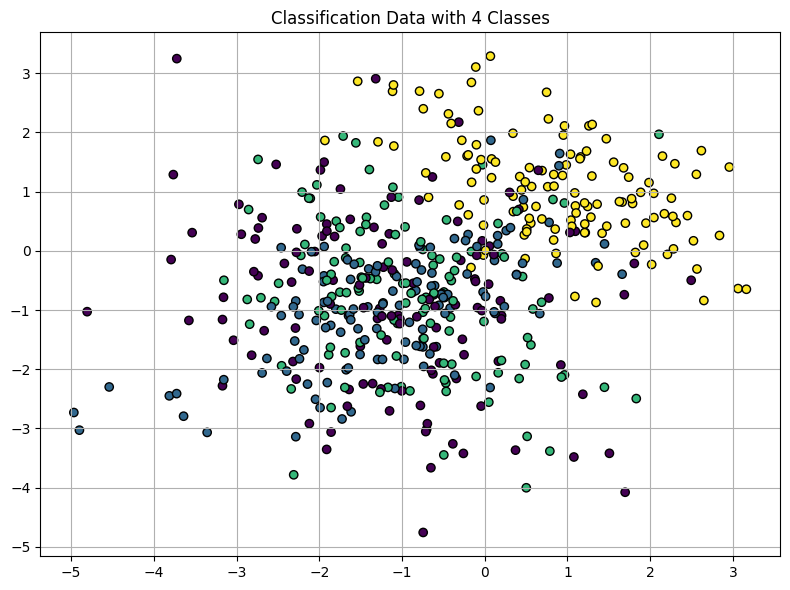

In [36]:
# Dataset
X, y = make_classification(n_samples = 500, n_features = 4, n_informative = 4, n_redundant = 0,
                            n_clusters_per_class = 1, n_classes = 4, random_state = 42)

# visulization
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, marker = 'o', edgecolor = 'k')
plt.title("Classification Data with 4 Classes")
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
# K-Means, DBSCAN, Agglomerative Clustering 3가지 모델에 대해 Clustering 수행
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### K-Means Clustering

In [38]:
km = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 100, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)
print("K-Means")
print(km)
print(km.cluster_centers_)
print('-'*20)

K-Means
KMeans(init='random', max_iter=100, n_clusters=4, n_init=10, random_state=0)
[[-0.8482109  -1.71488769 -1.36852176 -0.65124889]
 [-0.80109174 -0.53266796  1.31015614  0.80884934]
 [ 0.98824037  0.97028996 -0.9231856   1.02527368]
 [-1.93351616 -0.58426575  0.5805825  -1.98086544]]
--------------------


### K-Means Clustering Result Plot with centroid

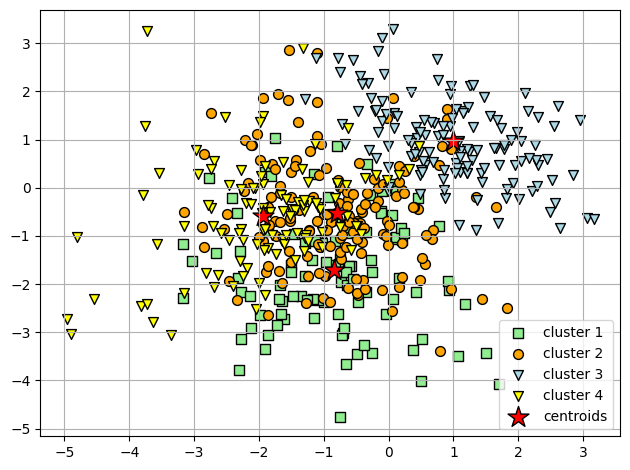

In [39]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='yellow',
            marker='v', edgecolor='black',
            label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### DBSCAN Clustering (eps = 0.43으로 parameter 조정하여 cluster 개수 4개로 만듬.)

In [40]:
db = DBSCAN(eps = 0.43, min_samples = 4, metric = 'euclidean')
y_db = db.fit_predict(X)
print("DBSCAN")
print(db)
print('Cluster labels: %s' % y_db)


DBSCAN
DBSCAN(eps=0.43, min_samples=4)
Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

### DBSCAN Clustering Result Plot

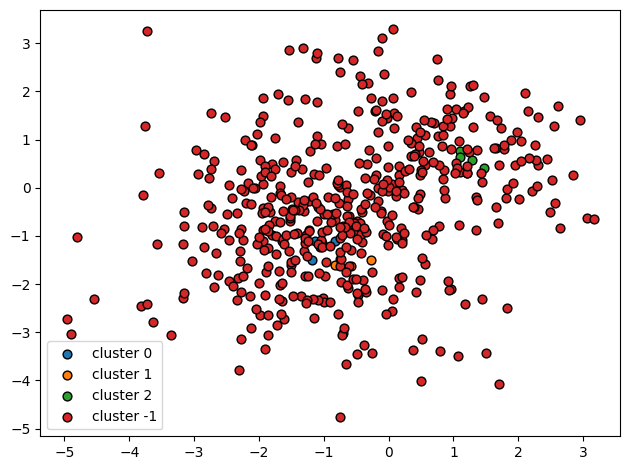

In [41]:
y_all = set(y_db)
for y in y_all:
    plt.scatter(X[y_db == y, 0], X[y_db == y, 1],
                marker='o', s=40,
                edgecolor='black', 
                label='cluster '+str(y))

plt.legend()
plt.tight_layout()
plt.show()

### Agglomerative Clustering

In [43]:
ac = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_ac = ac.fit_predict(X)
print(ac)
print('Cluster labels: %s' % y_ac)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)
Cluster labels: [1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 2 1 0 0 1 3 2 0 0 1 0 0 1 1 0 2 0 2 0 0 0
 1 0 2 0 1 0 2 1 1 0 0 0 0 2 2 1 1 0 1 0 0 0 1 1 0 1 3 0 0 0 2 1 0 2 0 0 0
 0 0 2 1 0 1 1 0 2 0 0 2 0 0 2 0 1 1 1 0 3 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 2 1 3 0 1 0 0 1 2 0 0 2 1 0 2 0 1 0 0 0 0 1 1 1 3 0 0
 0 1 0 2 2 1 0 0 0 1 1 0 0 0 3 1 0 1 0 1 1 2 0 1 0 0 1 1 1 0 0 1 1 0 1 3 0
 1 0 2 1 1 3 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 2 0 1 2 1 2 1 1 3 1 2 2 0 0
 0 2 1 0 0 1 3 1 0 1 0 1 1 1 2 1 1 0 2 0 1 0 1 3 1 2 1 1 1 1 0 0 2 3 1 2 1
 0 1 0 1 1 0 2 0 2 0 1 1 2 1 1 0 0 1 1 3 1 2 0 3 1 2 0 0 2 1 1 3 0 1 0 0 1
 0 1 0 1 1 0 1 0 2 0 0 0 0 1 0 0 3 1 2 2 0 1 1 1 0 1 1 1 0 1 3 1 0 0 2 3 1
 2 0 0 0 2 1 1 0 0 1 1 0 0 2 1 1 2 0 1 2 0 2 0 1 0 2 1 0 0 0 1 2 3 0 2 1 1
 0 3 0 0 2 0 0 1 3 2 1 0 0 1 3 0 0 0 1 2 0 1 0 2 0 1 1 0 0 1 0 1 2 1 0 1 3
 1 2 0 0 0 3 0 0 0 1 3 1 1 1 0 0 1 1 1 0 0 0 2 0 1 1 0 1 1 2 1 0 1 1 0 0 1
 0 0

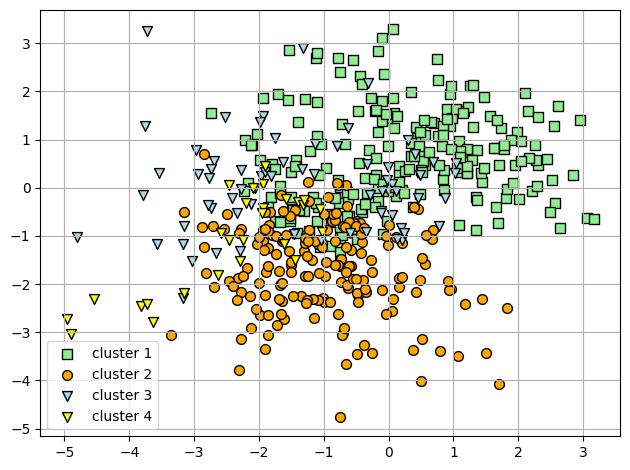

In [44]:
plt.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_ac == 2, 0],
            X[y_ac == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_ac == 3, 0],
            X[y_ac == 3, 1],
            s=50, c='yellow',
            marker='v', edgecolor='black',
            label='cluster 4')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# 3. 시간 내 제출 (10점)